<a id = "head"></a>
# Рынок заведений общественного питания Москвы
---

### Описание проекта

Необходимо подготовить исследование рынка заведений общественного питания г. Москвы на основе открытых данных.
Анализ рынка проводится, чтобы определить перспективы открытия небольшого кафе, обслуживание в котором будут осуществлять роботы. Проект требует много вложений. Чтобы убедить инвесторов вложить свои средства, нужно осветить текущее положение дел на рынке и оценить насколько такая концепция будет будет успешна.

---

### Описание данных

Представленная таблица содержит следующие данные:

   - id - уникальный номер объекта;
   - object_name — название объекта общественного питания;
   - chain — сетевой ресторан;
   - object_type — тип объекта общественного питания;
   - address — адрес;
   - number — количество посадочных мест.

### План выполнения проекта:
***

1. [Подготовка данных к анализу](#Step1)
2. [Анализ данных](#Step2)
   - [2.1 Вопросы 1-3;](#Step2.1)
   - [2.2 Вопросы 4-6;](#Step2.2)
   - [2.3 Вопросы 7-9.](#Step2.3)

3. [Общий вывод по проекту.](#Step3)

In [1]:
# Импорт библиотек:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from io import BytesIO
import requests
from termcolor import colored

<a id = "Step1"></a>
### Шаг 1. Изучение общей информации о данных
---

- [Введение](#Введение)  
- [2 Анализ данных](#Step2) 
    - [2.1](#Step2.1) Вопросы 1 - 3
    - [2.2](#Step2.2) Вопросы 4 - 6
    - [2.3](#Step2.3) Вопросы 7 - 9
- [3](#Step3) 
- [3 Общий вывод по проекту](#Step3)

In [2]:
rest_data = pd.read_csv(r'C:\Users\vladi\Downloads\data_for_analysis\rest_data.csv')

In [3]:
rest_data.sample(10)

,id,object_name,chain,object_type,address,number
15337,208477,Милти,да,предприятие быстрого обслуживания,"город Москва, 3-й Крутицкий переулок, дом 18",0
5223,21109,Столовая,нет,столовая,"город Москва, Огородный проезд, дом 18, строен...",88
4473,24957,SIXTIES,нет,кафе,"город Москва, улица Арбат, дом 16/2, строение 3",50
11619,173543,Кафе Мысли Кофе,нет,кафе,"город Москва, Духовской переулок, дом 17, стро...",0
10399,189460,Шаурма,нет,предприятие быстрого обслуживания,"город Москва, Новогиреевская улица, дом 31/45",0
9976,171233,Кошерная пицца,нет,кафе,"город Москва, Большой Спасоглинищевский переул...",30
7995,20439,бар гостиницы «Татьяна»,нет,бар,"город Москва, Стремянный переулок, дом 11",26
5853,23460,КАФЕ-БИСТРО,нет,кафе,"город Москва, Басовская улица, дом 16, строение 1",24
11789,186382,Кафе,нет,кафе,"город Москва, поселение Сосенское, посёлок Ком...",15
12056,176959,Ресторан «Планета Суши»,да,ресторан,"город Москва, Автозаводская улица, дом 18",50


In [4]:
rest_data.shape

(15366, 6)

In [5]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [6]:
rest_data.duplicated().sum()

0

In [7]:
rest_data[['object_name',  'chain', 'object_type', 'address', 
           'number']].duplicated().sum()

82

In [9]:
rest_data = rest_data[~rest_data[['object_name',  'chain', 
                                  'object_type', 'address', 'number']].duplicated()].reset_index(drop = True)

In [10]:
rest_data.shape

(15284, 6)

In [11]:
rest_data['object_type'].value_counts()

кафе                                 6071
столовая                             2584
ресторан                             2282
предприятие быстрого обслуживания    1898
бар                                   855
буфет                                 577
кафетерий                             395
закусочная                            349
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

---
В таблице содержатся сведения о 15284 заведениях общественного питания столицы. Все заведения разделены на 9 категорий. Пропусков в данных не обнаружено. Для каждого столбца используется корректный тип данных. Было найдено 82 дублирующиеся строки.

---
<font color="grey">
    
### *Баг-репорт*

*При более детальном рассмотрении данных можно заметить, что для заведений одной сети используется немного измененное название или разный регистр букв. Покажем это на примере Макдоналдса.*
</font>

In [12]:
rest_data[rest_data['object_name'].str.contains("макд", case = False, regex=True)]['object_name'].head(10)

120                                         МАКДОНАЛДС
156                              Ресторан «Макдоналдс»
159                                         МАКДОНАЛДС
328                                         Макдоналдс
426                                         Макдоналдс
698                              Ресторан «Макдоналдс»
1184                                        Макдоналдс
1257                                        МАКДОНАЛДС
1504                                        Макдоналдс
1804    Предприятие быстрого обслуживания «Макдоналдс»
Name: object_name, dtype: object

<font color="grey">

*Такую же проблему можно увидеть и по другим сетевым заведениям. Стоит обратить внимание разработчиков на эту проблему. Вероятнее всего ошибка происходит при формировании базы.*


*В рамках данного исследования названия сетей не представляют для наc, большого интереса. Однако, с этим связана ещё одна ошибка в данных. Покажем на примере того же Макдоналдса.*
</font>

In [13]:
rest_data[rest_data['object_name'].str.contains("макдоналд", case = False, regex=True)].head(10)

,id,object_name,chain,object_type,address,number
120,26075,МАКДОНАЛДС,да,предприятие быстрого обслуживания,"город Москва, Большая Бронная улица, дом 29",580
156,26279,Ресторан «Макдоналдс»,да,кафе,"город Москва, Варшавское шоссе, дом 143А",70
159,22301,МАКДОНАЛДС,да,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом 17",45
328,26131,Макдоналдс,да,ресторан,"город Москва, Дмитровское шоссе, дом 89, корпус 4",79
426,26713,Макдоналдс,да,кафе,"город Москва, Мясницкая улица, дом 30/1/2, стр...",131
698,20795,Ресторан «Макдоналдс»,да,предприятие быстрого обслуживания,"город Москва, проспект Мира, дом 97",143
1184,26251,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Большая Тульская улица, дом 2",80
1257,26714,МАКДОНАЛДС,да,кафе,"город Москва, улица Маросейка, дом 9/2, строен...",150
1504,25353,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Братиславская улица, дом 16, кор...",95
1804,20812,Предприятие быстрого обслуживания «Макдоналдс»,да,предприятие быстрого обслуживания,"город Москва, микрорайон Северное Чертаново, д...",36


<font color="grey">
    
*Можно заметить, что заведения Макдоналдс отличаются еще и по типу.*
</font>

---
**Попробуем немного обработать данные перед началом анализа.** 

In [14]:
rest_data[rest_data['chain'] == 'да']['object_name'].nunique()

724

До обработки в таблице находятся 724 уникальных сетевых заведений.

Начнем обработку с того, что создадим вспомогательный столбец, в котором все названия сетей приведем к нижнему регистру, а затем избавимся от лишних знаков и ссылок на тип объекта.

In [15]:
rest_data['new_name'] = rest_data['object_name'].str.lower()

In [16]:
# Напишем для этого функцию:
def remove_extra(name):
    extra = ['«', '»', "предприятие быстрого обслуживания ", 
             'кафе ', 'ресторан ', ' кальянный клуб', 'кафе-закусочная ', 'пбо ']
        
    for ex in extra:
        name = name.replace(ex, '')
    return name

In [17]:
rest_data.loc[rest_data['chain'] == 'да', 'new_name'] = \
rest_data.loc[rest_data['chain'] == 'да', 'new_name'].apply(remove_extra)

In [18]:
#rest_data[rest_data['chain'] == 'да'].sample(10)

In [19]:
rest_data[rest_data['chain'] == 'да'].groupby('new_name')['object_type'].count().sort_values(ascending = False)

new_name
kfc                                      173
шоколадница                              173
макдоналдс                               170
бургер кинг                              150
теремок                                  108
                                        ... 
кофейня кофемания, пиццерия бармалини      1
кофейня старбакс кофе                      1
тратория semplice                          1
кофемания starbucks                        1
beverly hills diner                        1
Name: object_type, Length: 457, dtype: int64

После обработки осталось 457 сетевых заведений. 

Посчитаем сколько заведений сети относятся к тому или иному типу. 

In [20]:
rest_typeA = rest_data[rest_data['chain'] == 'да'].groupby(['new_name', 'object_type'])\
    ['id'].agg('count').sort_values(ascending = False).reset_index()
rest_typeA

,new_name,object_type,id
0,шоколадница,кафе,166
1,макдоналдс,предприятие быстрого обслуживания,115
2,kfc,предприятие быстрого обслуживания,114
3,бургер кинг,предприятие быстрого обслуживания,105
4,теремок,предприятие быстрого обслуживания,65
...,...,...,...
677,москва - макдоналдс,ресторан,1
678,мск московская сеть кальянных,закусочная,1
679,мск московская сеть кальянных на шаболовке,кафе,1
680,му-му,ресторан,1


In [21]:
# Тип объекта общественного питания приведем к самому характерному для этой сети:
rest_typeB = rest_typeA.groupby(['new_name']).agg({'id':'max'}).sort_values(by = 'id', ascending = False).reset_index()
rest_typeB

,new_name,id
0,шоколадница,166
1,макдоналдс,115
2,kfc,114
3,бургер кинг,105
4,теремок,65
...,...,...
452,"кофе хаус,экспресс",1
453,starbucks coffee,1
454,кофе с собой кофейня,1
455,кофе с собой gate 42,1


In [22]:
rest_type = pd.merge(rest_typeB, rest_typeA, how = 'left', on = ['new_name', 'id'])
rest_type

,new_name,id,object_type
0,шоколадница,166,кафе
1,макдоналдс,115,предприятие быстрого обслуживания
2,kfc,114,предприятие быстрого обслуживания
3,бургер кинг,105,предприятие быстрого обслуживания
4,теремок,65,предприятие быстрого обслуживания
...,...,...,...
485,"кофе хаус,экспресс",1,кафе
486,starbucks coffee,1,кафе
487,кофе с собой кофейня,1,предприятие быстрого обслуживания
488,кофе с собой gate 42,1,кафе


In [23]:
# Создадим объект Series, где каждому индексу (в котором содержится название сети) 
# будет соответсвовать конкретный тип заведения. 
# Плюс уберем образовавшиеся дубликаты.
rest_type = rest_type[~rest_type['new_name'].duplicated()].drop('id', axis = 1)
#rest_type

In [24]:
rest_type = rest_type.groupby('new_name')['object_type'].first()
rest_type

new_name
beverly hills diner         ресторан
bierloga                        кафе
black & white                   кафе
bocconcino                  ресторан
boobo                       ресторан
                              ...   
ян примус                   ресторан
японский ваби-саби          ресторан
японской кухни маки-маки    ресторан
япоша                           кафе
ёрш                         ресторан
Name: object_type, Length: 457, dtype: object

In [25]:
#  Функция для изменения типа объекта. Она будет работать только для сетевых объектов:
def change(row):
    name = row['new_name']
    chain = row['chain']
    otype = row['object_type']
    
    if chain == 'да':
        return rest_type[name]
    else:
        return otype    

In [26]:
rest_data['object_type'] = rest_data.apply(change, axis = 1)

In [27]:
rest_data[rest_data['chain'] == 'да'].groupby(['new_name', 'object_type'])['id']\
    .count().sort_values(ascending = False)

new_name                               object_type                      
kfc                                    предприятие быстрого обслуживания    173
шоколадница                            кафе                                 173
макдоналдс                             предприятие быстрого обслуживания    170
бургер кинг                            предприятие быстрого обслуживания    150
теремок                                предприятие быстрого обслуживания    108
                                                                           ... 
кофейня кофемания, пиццерия бармалини  кафе                                   1
кофейня старбакс кофе                  кафе                                   1
тратория semplice                      ресторан                               1
кофемания starbucks                    кафе                                   1
beverly hills diner                    ресторан                               1
Name: id, Length: 457, dtype: int64

---
Проведя небольшую предобработку данных нам удалось сократить количество сетевых заведений с 724 до 457 и привести их к единому типу. (*Тем не менее в данных еще остались заведения, которые можно отнести к определенной сети. В силу того, что их названия написаны на двух языках или включают в себя много дополнительных слов и прочих знаков, их обработка требует использования более сложных методов*)

<a id = "Step2"></a>
### Шаг 2. Анализ данных
---

- [Введение](#Введение)  
- [1](#Step1) 
    - [2.1](#Step2.1) Вопросы 1 - 3
    - [2.2](#Step2.2) Вопросы 4 - 6
    - [2.3](#Step2.3) Вопросы 7 - 9
- [3](#Step3)

<a id = "Step2.1"></a>
#### 1) Соотношение видов объектов общественного питания по количеству
---

In [28]:
rest_by_type = rest_data.groupby('object_type', as_index = False)['id'].count()\
.sort_values(by = 'id', ascending = False).reset_index(drop=True)

In [29]:
rest_by_type

,object_type,id
0,кафе,6106
1,столовая,2581
2,ресторан,2166
3,предприятие быстрого обслуживания,2128
4,бар,853
5,буфет,568
6,кафетерий,355
7,закусочная,303
8,магазин (отдел кулинарии),224


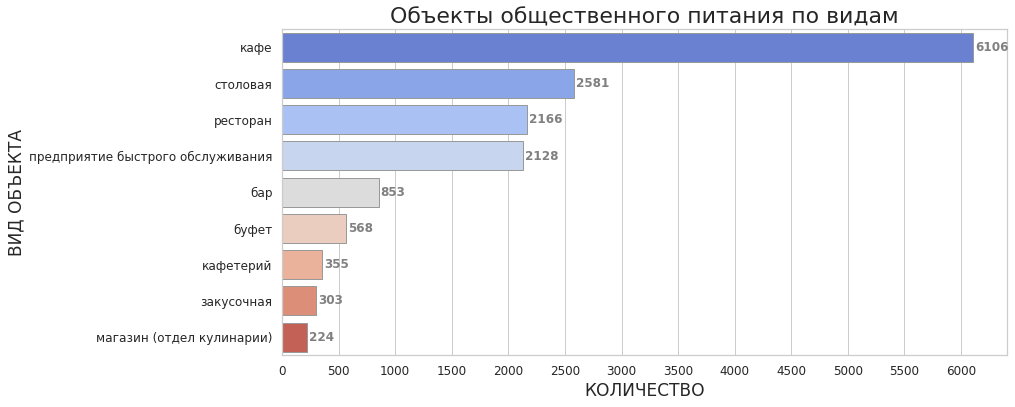

In [30]:
sns.set(style="whitegrid")

plt.figure(figsize=(13, 6))
sns.barplot(y='object_type', x='id', 
            data=rest_by_type, 
            palette = 'coolwarm', edgecolor=".6")

for i, y, z in zip(rest_by_type.id, rest_by_type.index, rest_by_type.id):
    plt.text(i+17, y, z, color='grey', fontweight='bold', verticalalignment='center')
    
plt.title("Объекты общественного питания по видам", fontsize=22)
plt.ylabel("ВИД ОБЪЕКТА", fontsize = 17)
plt.xlabel("КОЛИЧЕСТВО", fontsize = 17)
xtick_location = range(0,6500,500)
plt.xticks(ticks=xtick_location, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

По имеющимся данным в Москве преобладают кафе - 6155 заведений. На втором месте находятся столовые. Скорее всего это связано с большим числом образовательных учреждений, а также различными предприятиями, при которых существуют данные объекты. ТОП-3 замыкают рестораны.

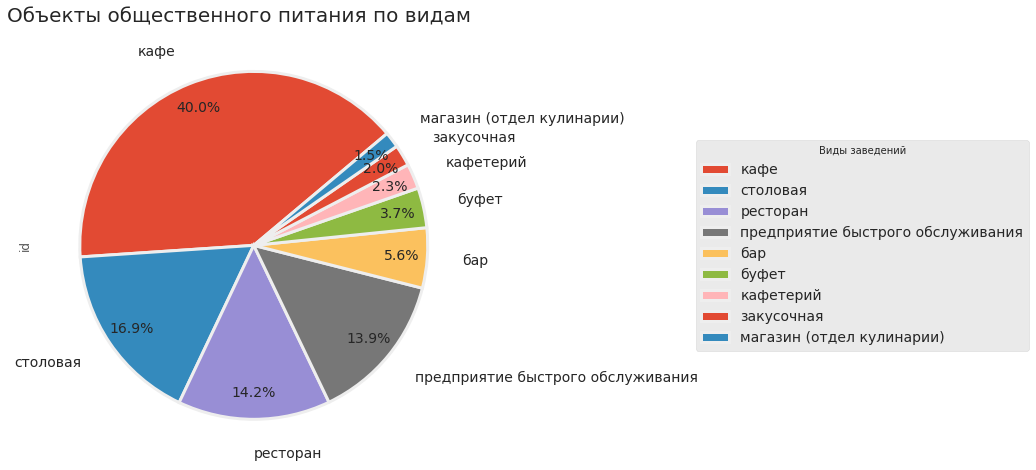

In [31]:
plt.style.use('ggplot')
labels = rest_by_type['object_type']
rest_by_type.plot(kind='pie', y='id', 
                  autopct='%1.1f%%', 
                  labels = labels, 
                  figsize=(8, 8), 
                  startangle=40,
                 pctdistance = 0.85, 
                  fontsize = 14, 
                  labeldistance = 1.2,
                  wedgeprops = {'linewidth': 3})
plt.legend(title="Виды заведений", loc="center left",
          fontsize = 14, bbox_to_anchor=(1.5, 0, 0.5, 1))
plt.title("Объекты общественного питания по видам", loc='right', fontsize=20);

В совокупности кафе, столовые и рестораны занимают больше `70%` всего рынка общепита столицы. 

---
#### 2)Отношение сетевых и несетевых заведений по количеству
---

In [32]:
rest_data['const'] = 1

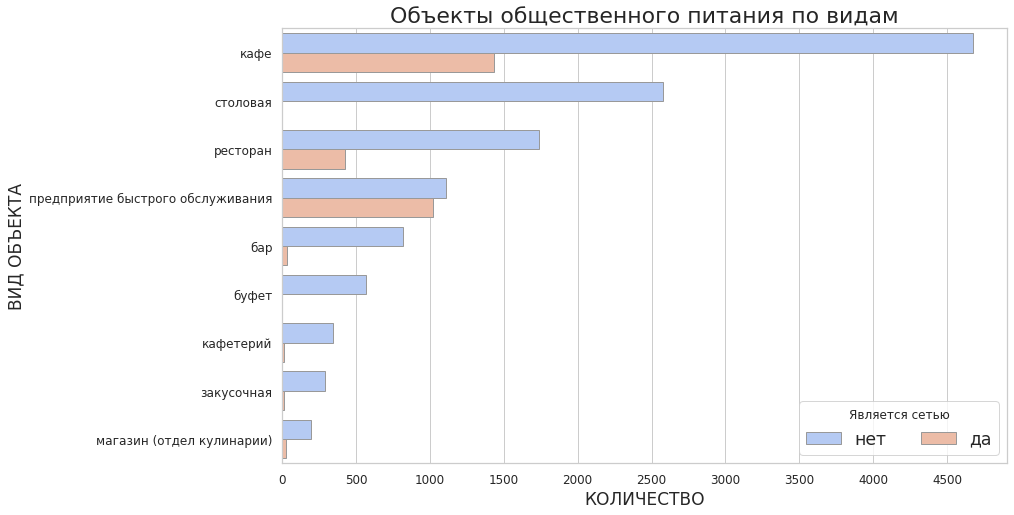

In [33]:
sns.set(style="whitegrid")

order = rest_by_type['object_type']

plt.figure(figsize=(13, 8))
sns.barplot(y='object_type', x='const', hue = 'chain', 
            data=rest_data, palette = 'coolwarm', 
            estimator=sum, order = order, edgecolor=".6")
    
plt.title("Объекты общественного питания по видам", fontsize=22)
plt.ylabel("ВИД ОБЪЕКТА", fontsize = 17)
plt.xlabel("КОЛИЧЕСТВО", fontsize = 17)
xtick_location = range(0,5000,500)
plt.xticks(ticks=xtick_location, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(ncol=2, loc="lower right", 
           title = 'Является сетью', frameon=True, 
           fontsize = 'x-large')
plt.show()


Как видно из построенного графика сетевых заведений в разы меньше. Чаще всего сетями становятся кафе, предприятия быстрого обслуживания и рестораны. Весомую долю в своем сегменте занимают сети фастфудов.  

In [34]:
grouped1 = rest_data.groupby('chain', as_index = False)['const'].sum()
grouped1

,chain,const
0,да,2964
1,нет,12320


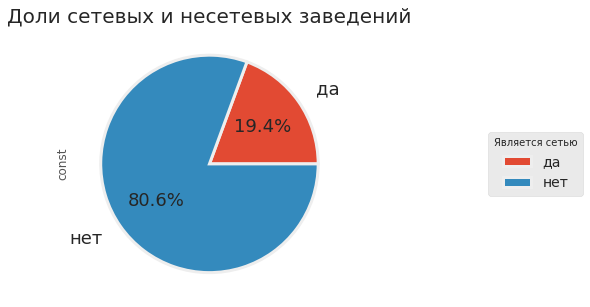

In [35]:
plt.style.use('ggplot')

grouped1.plot(kind='pie', y='const', 
                  autopct='%1.1f%%', 
                  labels = ['да', 'нет'], 
                  figsize=(5, 5), 
                  fontsize = 18, 
                  labeldistance = 1.2,
                  wedgeprops = {'linewidth': 3},
            legend = True)
plt.legend(title="Является сетью", loc="center left",
          fontsize = 14, bbox_to_anchor=(1.5, 0, 0.5, 1))
plt.title("Доли сетевых и несетевых заведений", fontsize=20);

Доля несетевых объектов общественного питания превышает `80%`.

In [36]:
grouped2 = rest_data.pivot_table(index = 'object_type', 
                                 columns = 'chain', 
                                 values = 'const', 
                                 aggfunc ='sum', margins=True)
grouped2['Доля сетей'] = round((grouped2['да'] / grouped2['All'])*100, 2)
grouped2['Доля несетевых'] = round((grouped2['нет'] / grouped2['All'])*100, 2)
grouped2.columns = ['Сеть', 'Не сеть', 'Всего', 'Доля сетей', 'Доля несетевых']
grouped2.style.set_table_styles([dict(selector='th', props=[('text-align', 'right')])])\
.bar(subset=['Доля сетей'], color='#fbc531')

,Сеть,Не сеть,Всего,Доля сетей,Доля несетевых
object_type,,,,,
бар,35,818,853,4.1,95.9
буфет,2,566,568,0.35,99.65
закусочная,10,293,303,3.3,96.7
кафе,1431,4675,6106,23.44,76.56
кафетерий,12,343,355,3.38,96.62
магазин (отдел кулинарии),29,195,224,12.95,87.05
предприятие быстрого обслуживания,1018,1110,2128,47.84,52.16
ресторан,427,1739,2166,19.71,80.29
столовая,nan,2581,2581,nan,100


#### 3) Для какого вида объекта общественного питания характерно сетевое распространение?*

---
Сетевое распространение характерно для **предприятий быстрого обслуживаиния**.

<a id = "Step2.2"></a>
#### 4)  Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

---

- [Введение](#Введение)  
- [1](#Step1) 
    - [2.1](#Step2.1) Вопросы 1 - 3
    - [2.3](#Step2.3) Вопросы 7 - 9
- [3](#Step3)

Сделаем срез данных по сетевым заведениям сгруппируем их:

In [37]:
chain_grouped = rest_data[rest_data['chain'] == 'да']\
    .groupby('new_name')['id', 'number']\
    .agg({'id':'count', 'number':'median'})\
    .rename(columns={'id': 'count_objects', 'number': 'mean_seats'})
chain_grouped.sort_values(by = 'count_objects',ascending = False).head()

,count_objects,mean_seats
new_name,,
kfc,173,46.0
шоколадница,173,50.0
макдоналдс,170,76.0
бургер кинг,150,45.0
теремок,108,24.5


*Построим график плотности распределения и регрессию.*

<Figure size 864x720 with 0 Axes>

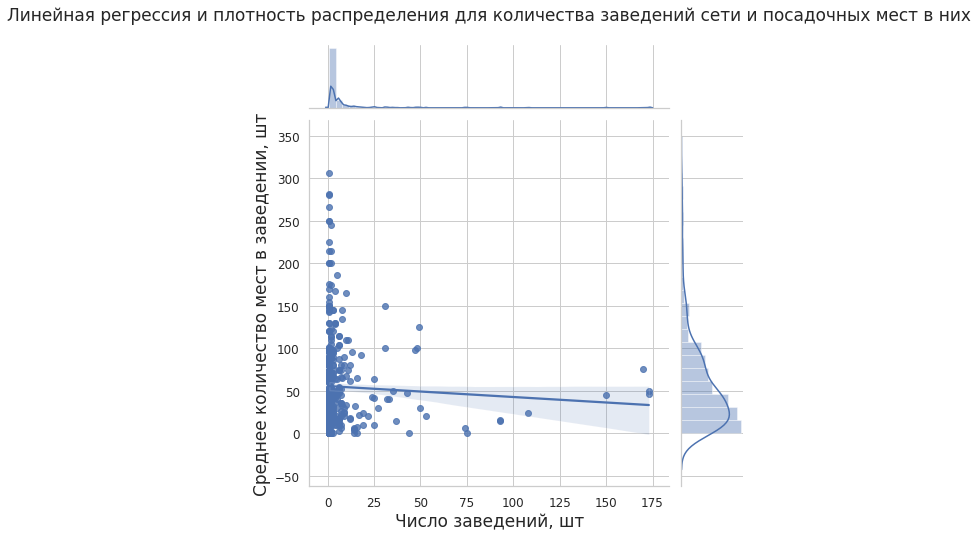

In [38]:
sns.set(style="whitegrid")

#print("Линейная регрессия и плотность распределения для количества заведений сети и посадочных мест в них")
plt.figure(figsize=(12, 10));

sns.jointplot(y="mean_seats", x="count_objects", data=chain_grouped, 
              kind="reg", truncate=True,
              #xlim=(-1, 175), ylim=(-5, 320),
              color='b', height=7);
plt.title("Линейная регрессия и плотность распределения для количества заведений сети и посадочных мест в них", 
         pad=100, fontsize = 17)
plt.ylabel("Среднее количество мест в заведении, шт", fontsize = 17)
plt.xlabel("Число заведений, шт", fontsize = 17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show();


In [39]:
chain_grouped.corr()

,count_objects,mean_seats
count_objects,1.00000,-0.04823
mean_seats,-0.04823,1.00000


Связь между числом заведений в сети и количеством посадочных мест практически отсутствует.

*Получилось не очень наглядно. В данных присутсвуют выбросы.*

---
Посмотрим на разброс данных по каждому показателю. 

--------------- Количество ресторанов в сети ---------------

Описательная статистика

count    457.000000
mean       6.485777
std       19.091318
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max      173.000000
Name: count_objects, dtype: float64
---------------
[11.  25.4 99.6]



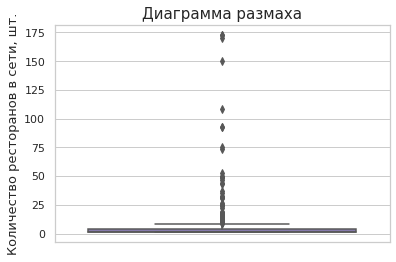

--------------- Среднее количество посадочных мест ---------------

Описательная статистика

count    457.000000
mean      54.957330
std       51.085947
min        0.000000
25%       18.500000
50%       42.000000
75%       80.000000
max      306.000000
Name: mean_seats, dtype: float64
---------------
[115. 150. 250.]



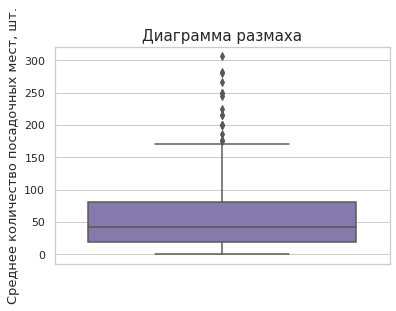

In [40]:
dic = {'count_objects':'Количество ресторанов в сети', 'mean_seats':'Среднее количество посадочных мест'}
for i in chain_grouped:
    
    print('-'*15, dic[i], '-'*15)
    print()
    print('Описательная статистика')
    print()
    print(chain_grouped[i].describe())
    print('-'*15)
    print(np.percentile(chain_grouped[i], [90, 95, 99]))
    print()
    sns.boxplot(y=[i], palette=["m", "g"], data=chain_grouped)
    plt.title("Диаграмма размаха", fontsize = 15)
    if dic[i] == 'Количество ресторанов в сети':
        plt.ylabel("Количество ресторанов в сети, шт.", fontsize = 13)
    else:
        plt.ylabel("Среднее количество посадочных мест, шт.", fontsize = 13)
    
    
    #sns.despine(offset=10, trim=True)
    
    plt.show()

Довольно странные результаты у нас получились. По факту сетью можно считать, когда у заведения хотя бы две точки. Одноко, в нашем случае половина сетей имеет только одно помещение. Скорее всего это связано с той проблемой в данных, которую мы заметили ранее. Для многих заведений одной сети в таблице используется измененное название. Также есть вероятность, что не все заведения какой-то определенной сети попали в наши данные.

Что касается среднего числа посадочных мест в заведениях, то здесь данные более обнородные и выбросов гораздо меньше. В половине сетевых общепитов число мест не превышает 42. 

Для определения границы аномальных данных используем 95% перцентили по каждому показателю.

In [41]:
chain_grouped_norm = chain_grouped.query('count_objects < 25 & mean_seats < 150')
#chain_grouped_norm

<Figure size 864x720 with 0 Axes>

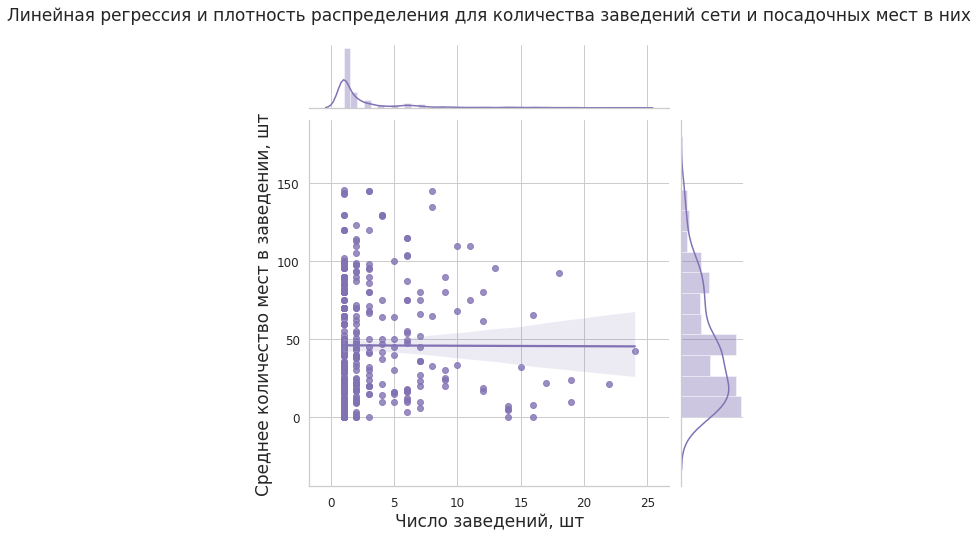

In [42]:
sns.set(style="whitegrid")

#print("Линейная регрессия и плотность распределения для количества заведений сети и посадочных мест в них")
plt.figure(figsize=(12, 10));

sns.jointplot(y="mean_seats", x="count_objects", data=chain_grouped_norm, 
              kind="reg", truncate=True,
              color='m', height=7);
plt.title("Линейная регрессия и плотность распределения для количества заведений сети и посадочных мест в них", 
         pad=100, fontsize = 17)
plt.ylabel("Среднее количество мест в заведении, шт", fontsize = 17)
plt.xlabel("Число заведений, шт", fontsize = 17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show();

In [43]:
chain_grouped_norm.corr()

,count_objects,mean_seats
count_objects,1.000000,-0.003006
mean_seats,-0.003006,1.000000


---
После обработки данных связь между количеством заведений и числом посадочных мест стала еще меньше.

*Рассмотрим еще один случай и проверим зависимость числа точек от количетва мест в сетях от 2 заведений.*

In [44]:
chain_grouped_norm1 = chain_grouped.query('1 < count_objects < 25 & mean_seats < 150')

<Figure size 864x720 with 0 Axes>

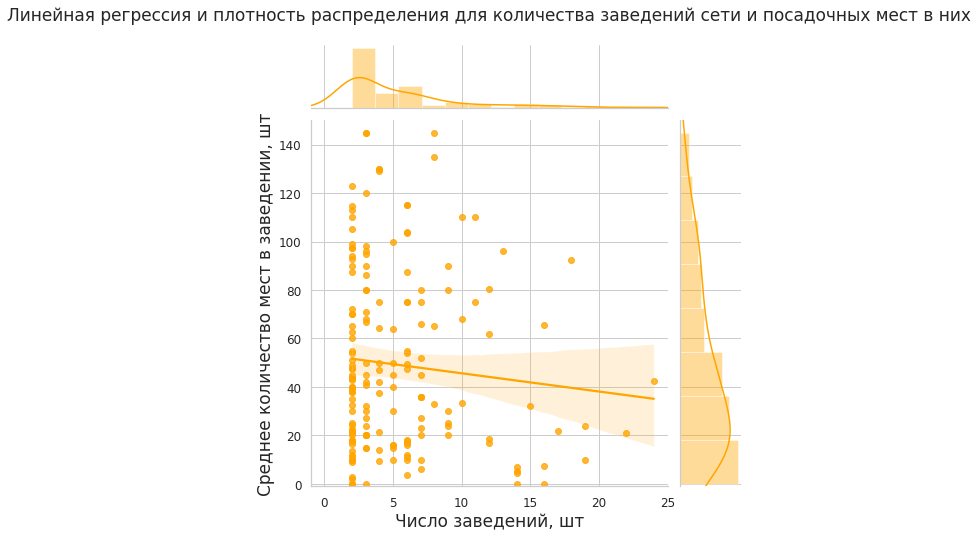

In [45]:
sns.set(style="whitegrid")

#print("Линейная регрессия и плотность распределения для количества заведений сети и посадочных мест в них")
plt.figure(figsize=(12, 10));

sns.jointplot(y="mean_seats", x="count_objects", data=chain_grouped_norm1, 
              kind="reg", truncate=True,
              xlim=(-1, 25), ylim=(-1, 150),
              color='orange', height=7);
plt.title("Линейная регрессия и плотность распределения для количества заведений сети и посадочных мест в них", 
         pad=100, fontsize = 17)
plt.ylabel("Среднее количество мест в заведении, шт", fontsize = 17)
plt.xlabel("Число заведений, шт", fontsize = 17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show();

In [46]:
chain_grouped_norm1.corr()

,count_objects,mean_seats
count_objects,1.000000,-0.089797
mean_seats,-0.089797,1.000000


Картина приблизительно такая же. Зависимости здесь не наблюдается. 

Поэтому говорить о том, что более характерно для сетевых заведений общественного питания по этим двум показателям нельзя. И это вполне логично. Ведь небольшие кафе становятся успешными сетями не потому, что у них много или мало посадочных мест, а скорее из-за их концепции или просто потому, что людям нравится как там готовят.

---
#### 5) Какой тип объекта общественного питания предоставляет в среднем самое большое количество посадочных мест? 

In [47]:
seats_by_types = rest_data.groupby('object_type', as_index = False)['number']\
    .mean().sort_values(by = 'number', ascending = False).reset_index(drop=True)
#seats_by_types

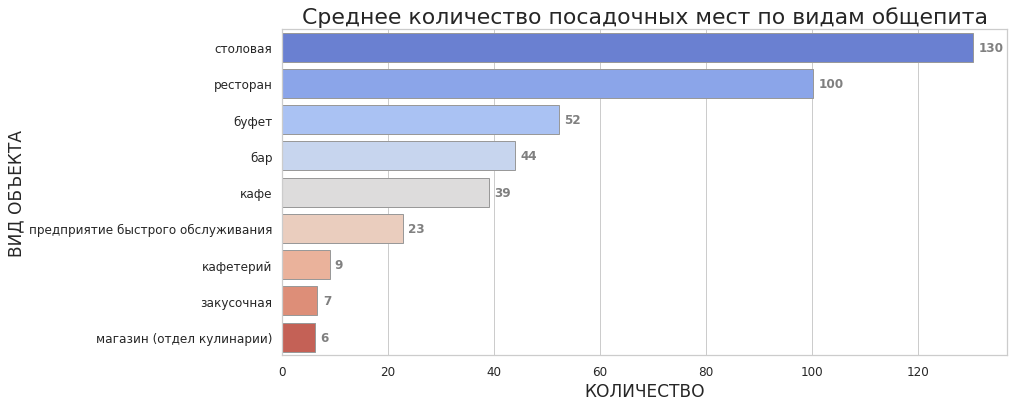

In [48]:
sns.set(style="whitegrid")

plt.figure(figsize=(13, 6))
sns.barplot(y='object_type', x='number', 
            data=seats_by_types, 
            palette = 'coolwarm', edgecolor=".6")

for i, y, z in zip(seats_by_types.number, seats_by_types.index, seats_by_types.number):
    plt.text(i+1, y, round(z), color='grey', fontweight='bold', verticalalignment='center')
    
plt.title("Среднее количество посадочных мест по видам общепита", fontsize=22)
plt.ylabel("ВИД ОБЪЕКТА", fontsize = 17)
plt.xlabel("КОЛИЧЕСТВО", fontsize = 17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

---

Самое большое количество посадочных мест предоставляют столовые - 130 штук в среднем. Далее идут рестораны и буфеты - по 100 и 52 места соответственно.

#### 6) Выделим в отдельный столбец информацию об улице из столбца "Адрес" .

In [49]:
# Напишем для этого функцию:
def find_street(address):
    
    extra = ['улица', 'проспект', 'шоссе', 'площадь', 'бульвар', 
             'переулок', 'набережная', 'проезд', 'аллея','километр',
             'деревня', 'посёлок', 'тупик', 'микрорайон', 'корпус', 
             'линия', 'территория', 'село', 'просек', 'квартал', 'вблизи']
    ad_split = address.split(', ')
    for i in ad_split:
        for j in extra:
            if j in i.lower():
                return i
            else:
                continue

In [50]:
#address = 'город Москва, Кривоколенный переулок, дом 9, строение 2' 
#find_street(address)

In [51]:
rest_data['street'] = rest_data['address'].apply(find_street)

In [52]:
rest_data.sample(5)

,id,object_name,chain,object_type,address,number,new_name,const,street
790,125582,ДЖОН ДЖОЛИ,да,ресторан,"город Москва, Новослободская улица, дом 14/19,...",90,джон джоли,1,Новослободская улица
11616,173413,Чайхона тандыр хаус,нет,кафе,"город Москва, Комсомольская площадь, дом 6, со...",0,чайхона тандыр хаус,1,Комсомольская площадь
9729,169467,She and Him,нет,кафе,"город Москва, Усачёва улица, дом 2, строение 3",40,she and him,1,Усачёва улица
15187,213500,Милти,да,предприятие быстрого обслуживания,"город Москва, проспект Андропова, дом 8",0,милти,1,проспект Андропова
11243,187425,Кафе «Mavi»,нет,кафе,"город Москва, 2-й Южнопортовый проезд, дом 18,...",100,кафе «mavi»,1,2-й Южнопортовый проезд


<a id = "Step2.3"></a>

---
#### 7) TOП улиц по количеству объектов общественного питания

---

- [Введение](#Введение)  
- [1](#Step1) 
    - [2.1](#Step2.1) Вопросы 1 - 3
    - [2.2](#Step2.2) Вопросы 4 - 6
- [3](#Step3)

In [53]:
top_streets = rest_data.groupby('street', as_index = False)['id'].count()\
    .sort_values(by = 'id', ascending = False).reset_index(drop=True).head(10)
top_streets.columns = ['street', 'count_rest']

In [54]:
#top_streets

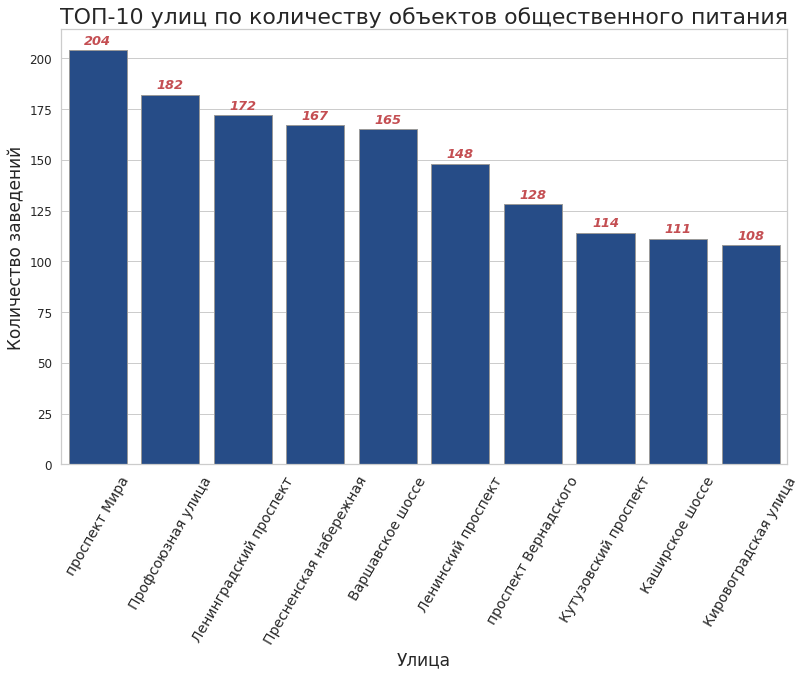

In [55]:
sns.set(style="whitegrid")

plt.figure(figsize=(13, 8))
sns.barplot(y='count_rest', x='street', 
            data=top_streets, 
            color='#164897', edgecolor=".6")

for i, count in enumerate(top_streets['count_rest']):
    plt.text(i, count+3, count, horizontalalignment='center', 
             fontsize = 13, color = 'r', fontweight = 'bold', fontstyle='italic')
    
plt.title("ТОП-10 улиц по количеству объектов общественного питания", fontsize=22)
plt.ylabel("Количество заведений", fontsize = 17)
plt.xlabel("Улица", fontsize = 17)
plt.xticks(fontsize=14, rotation = 60)
plt.yticks(fontsize=12)

plt.show()

*Больше всего заведений общепита находятся на проспекте Мира, Профсоюзной улице и Ленинградском проспекте.*

---
#### Теперь посмотрим в каких районах находятся эти улицы. Для этого придется использовать внешние источники данных.

Загрузим базу данных адресов улиц Москвы с портала открытых данных Правительства Москвы https://data.mos.ru/opendata/7705031674-adresniy-reestr-zdaniy-i-soorujeniy-v-gorode-moskve (ссылка на оригинальную базу).

In [56]:
# Чтобы уменьшить размер таблицы,предварительно были удалены некоторые ненужные нам данные 
# (иначе было невозможно загрузить её в Google Sheets).
file_id = "11Rx0dOpWegQN2bPD2Md6Cj7dCO7S-k3rE2ifC1bPhhk"
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(file_id)
r = requests.get(file_name)
adrs = pd.read_excel(BytesIO(r.content))

In [57]:
adrs_copy = adrs.copy()

In [58]:
adrs.head()

,OBJ_TYPE,OnTerritoryOfMoscow,ADDRESS,UNOM,P1,P5,P7,L1_TYPE,L1_VALUE,ADM_AREA,DISTRICT
0,Здание,да,"город Москва, Варшавское шоссе, дом 150, строе...",3802928,город Москва,муниципальный округ Чертаново Южное,Варшавское шоссе,дом,150,Южный административный округ,муниципальный округ Чертаново Южное
1,Здание,да,"город Москва, Косинская улица, дом 26А",2102436,город Москва,муниципальный округ Вешняки,Косинская улица,дом,26А,Восточный административный округ,муниципальный округ Вешняки
2,Здание,да,"город Москва, Гороховский переулок, дом 21",5783,город Москва,муниципальный округ Басманный,Гороховский переулок,дом,21,Центральный административный округ,муниципальный округ Басманный
3,Здание,да,"город Москва, Тагильская улица, дом 4, строени...",2404968,город Москва,муниципальный округ Метрогородок,Тагильская улица,дом,4,Восточный административный округ,муниципальный округ Метрогородок
4,Здание,да,"город Москва, Ленинградский проспект, дом 73А,...",2133081,город Москва,муниципальный округ Сокол,Ленинградский проспект,дом,73А,Северный административный округ,муниципальный округ Сокол


In [59]:
adrs = adrs.drop_duplicates().reset_index(drop = True)

In [60]:
# Оставим в таблице столбцы с названием улиц, районов и округов:
adrs = adrs[['P7', 'ADM_AREA', 'DISTRICT']]\
    .rename(columns = {'P7':'street', 'ADM_AREA':'adm_area', 'DISTRICT':'district'})

In [61]:
adrs.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164000 entries, 0 to 163999
Data columns (total 3 columns):
street      135911 non-null object
adm_area    164000 non-null object
district    164000 non-null object
dtypes: object(3)
memory usage: 3.8+ MB


In [62]:
adrs = adrs[~adrs['street'].isna()]

In [63]:
# Сгруппируем данные по названиям улиц и посмотрим к каким округам и районам они относятся:
streets_gr = adrs.groupby('street').agg({'district': 'unique', 
                                         'adm_area': 'unique'})

In [64]:
streets_gr.sample(5)

,district,adm_area
street,,
2-я Прогонная улица,[муниципальный округ Богородское],[Восточный административный округ]
Аэрофлотская улица,[муниципальный округ Внуково],[Западный административный округ]
Фермерская улица,[внутригородская территория поселение Марушкин...,[Новомосковский административный округ]
3-я Северная улица,[внутригородская территория поселение Марушкин...,[Новомосковский административный округ]
Новопоселковая улица,[муниципальный округ Южное Тушино],[Северо-Западный административный округ]


In [65]:
# Объединим полученные данные с основной таблицей
rest_data = rest_data.merge(streets_gr, how = 'left', left_on='street', right_on='street')

In [66]:
#rest_data.sample(5)

In [67]:
top_streets_new = rest_data.groupby('street')[['id','district','adm_area']]\
    .agg({'id':'count', 'district':'first', 'adm_area':'first'}).sort_values(by='id', ascending = False).head(10)
top_streets_new.columns = ['Количество_заведений', 'Муниципальный_округ', 'Административный_округ']

In [68]:
pd.options.display.max_colwidth = 300
top_streets_new[['Количество_заведений','Муниципальный_округ']]\
    .style.set_table_styles([dict(selector='tr:hover', props=[('text-align', 'right')])])

,Количество_заведений,Муниципальный_округ
street,,
проспект Мира,204,['муниципальный округ Алексеевский' 'муниципальный округ Ростокино' 'муниципальный округ Мещанский' 'муниципальный округ Останкинский' 'муниципальный округ Ярославский' 'муниципальный округ Свиблово' 'муниципальный округ Гагаринский' 'муниципальный округ Тверской']
Профсоюзная улица,182,['муниципальный округ Ясенево' 'муниципальный округ Коньково' 'муниципальный округ Теплый Стан' 'муниципальный округ Академический' 'муниципальный округ Черемушки' 'муниципальный округ Обручевский']
Ленинградский проспект,172,['муниципальный округ Сокол' 'муниципальный округ Хорошевский' 'муниципальный округ Аэропорт' 'муниципальный округ Беговой']
Пресненская набережная,167,муниципальный округ Пресненский
Варшавское шоссе,165,['муниципальный округ Чертаново Южное' 'муниципальный округ Донской' 'муниципальный округ Нагатино-Садовники' 'муниципальный округ Нагорный' 'муниципальный округ Чертаново Северное' 'муниципальный округ Северное Бутово' 'муниципальный округ Чертаново Центральное' 'муниципальный округ Южное Бутово']
Ленинский проспект,148,['муниципальный округ Гагаринский' 'муниципальный округ Ломоносовский' 'муниципальный округ Якиманка' 'муниципальный округ Проспект Вернадского' 'муниципальный округ Тропарево-Никулино' 'муниципальный округ Обручевский' 'муниципальный округ Донской' 'муниципальный округ Теплый Стан']
проспект Вернадского,128,['муниципальный округ Проспект Вернадского' 'муниципальный округ Тропарево-Никулино' 'муниципальный округ Ломоносовский' 'муниципальный округ Раменки' 'муниципальный округ Гагаринский']
Кутузовский проспект,114,['муниципальный округ Дорогомилово' 'муниципальный округ Фили-Давыдково']
Каширское шоссе,111,['муниципальный округ Нагатино-Садовники' 'муниципальный округ Москворечье-Сабурово' 'муниципальный округ Орехово-Борисово Южное' 'муниципальный округ Орехово-Борисово Северное' 'муниципальный округ Нагатинский Затон']


---
Мы получили таблицу в которой видно к каким районам города относится та или иная улица. Улицы из топ-10 преимущественно находятся в разных частях города и не пересекаются. Здесь можно выделить только Пресненскую набережную. Она на четвертом месте по количеству объектов общественного питания, но в отличие от остальных, находится в пределах одного района. Также это самая короткая из всех представленных в нашем топе улица. 

Такая высокая плотность общепитов в одном месте обусловлена тем, что на пресненской набережной располагается Московский международный деловой центр «Москва-Сити». Здесь очень много офисов, большой торговый центр, а также находится экспоцентр.

---
*Также необходо отметить некоторые ошибки. Проспект Мира каким-то образом попал в Гагаринский район, хотя они находятся в противоположных частях Москвы.* Скорее свего это несоответствие пришло к нам из внешнего источника данных.

In [70]:
adrs_copy = adrs_copy.drop_duplicates().reset_index(drop = True)

In [84]:
adrs_copy[(adrs_copy['P7'] == 'проспект Мира') & (adrs_copy['P5'] == 'муниципальный округ Гагаринский')]

,OBJ_TYPE,OnTerritoryOfMoscow,ADDRESS,UNOM,P1,P5,P7,L1_TYPE,L1_VALUE,ADM_AREA,DISTRICT
153241,Земельный участок,да,"город Москва, проспект Мира, владение 23А/2",5050040,город Москва,муниципальный округ Гагаринский,проспект Мира,владение,23А/2,Юго-Западный административный округ,муниципальный округ Гагаринский


----
#### 8) Выделим улицы с одним объектом общественного питания и посмотрим в каких районах Москвы они находятся.

In [64]:
one_obj_street = rest_data.groupby('street', as_index = False)['id'].count()

In [65]:
len(one_obj_street)

2088

In [66]:
one_obj_street = one_obj_street[one_obj_street['id'] == 1]\
        .merge(adrs, how = 'left', left_on='street', right_on='street')\
        .drop_duplicates()
one_obj_street.head()

,street,id,adm_area,district
0,1-й Балтийский переулок,1,Северный административный округ,муниципальный округ Аэропорт
9,1-й Басманный переулок,1,Центральный административный округ,муниципальный округ Красносельский
12,1-й Басманный переулок,1,Центральный административный округ,муниципальный округ Басманный
25,1-й Ботанический проезд,1,Северо-Восточный административный округ,муниципальный округ Свиблово
34,1-й Вешняковский проезд,1,Юго-Восточный административный округ,муниципальный округ Рязанский


In [67]:
pivot_one_obj = one_obj_street.pivot_table(index = ['district','adm_area'], values = 'street', aggfunc = ['count'])

In [68]:
pivot_one_obj.columns = ['count_street']

In [69]:
pivot_one_obj.sort_values(by=['count_street'], ascending = False).head(15)

,,count_street
district,adm_area,
муниципальный округ Таганский,Центральный административный округ,27
муниципальный округ Хамовники,Центральный административный округ,26
муниципальный округ Басманный,Центральный административный округ,24
муниципальный округ Тверской,Центральный административный округ,20
муниципальный округ Пресненский,Центральный административный округ,20
муниципальный округ Марьина Роща,Северо-Восточный административный округ,18
муниципальный округ Арбат,Центральный административный округ,15
муниципальный округ Сокольники,Восточный административный округ,15
муниципальный округ Замоскворечье,Центральный административный округ,14


In [70]:
pivot_one_obj.sort_values(by=['count_street'], ascending = False).tail(15)

,,count_street
district,adm_area,
муниципальный округ Куркино,Северо-Западный административный округ,1
муниципальный округ Левобережный,Северный административный округ,1
муниципальный округ Алтуфьевский,Северо-Восточный административный округ,1
муниципальный округ Марфино,Северо-Восточный административный округ,1
муниципальный округ Марьино,Юго-Восточный административный округ,1
внутригородская территория поселение Роговское,Троицкий административный округ,1
муниципальный округ Матушкино,Зеленоградский административный округ,1
муниципальный округ Метрогородок,Восточный административный округ,1
муниципальный округ Москворечье-Сабурово,Южный административный округ,1


In [71]:
len(pivot_one_obj)

127

---
В Москве обнаружено 756 улиц, на каждой из которых находится всего одно заведение общественного питания. Эти улицы распределены по 127 районам. Было выявлено, что в центральных районах (Таганский, Хамовники, Басманный) больше улиц с одним общепитом нежели чем в спальных районах (Марьино, Перово, Левобережный). Это связано с тем, что центре города исторически более плотная застройка с множеством улиц небольшой протяженности. 

#### 9) Построим распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

--------------- Распределение количества посадочных мест: проспект Мира ---------------

count    204.000000
mean      62.696078
std       58.972447
min        0.000000
25%       20.000000
50%       46.500000
75%       90.000000
max      326.000000
Name: number, dtype: float64



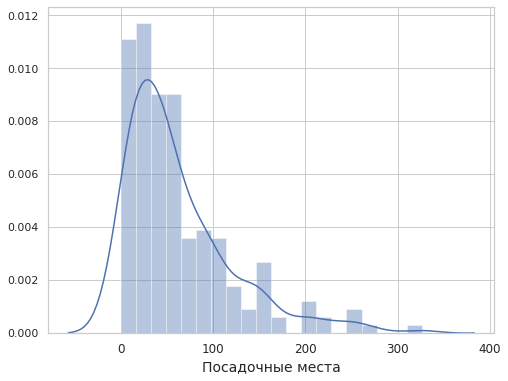

--------------- Распределение количества посадочных мест: Профсоюзная улица ---------------

count    183.000000
mean      47.360656
std       57.443532
min        0.000000
25%        5.000000
50%       24.000000
75%       67.500000
max      240.000000
Name: number, dtype: float64



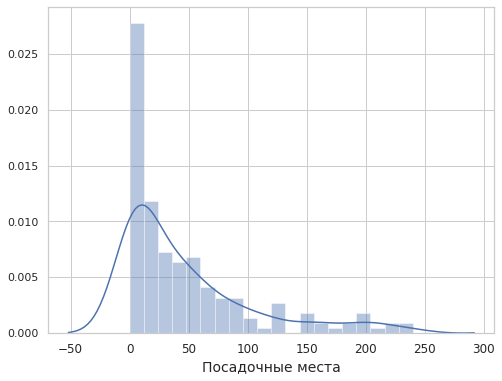

--------------- Распределение количества посадочных мест: Ленинградский проспект ---------------

count    173.000000
mean      52.265896
std       62.939883
min        0.000000
25%       15.000000
50%       40.000000
75%       70.000000
max      625.000000
Name: number, dtype: float64



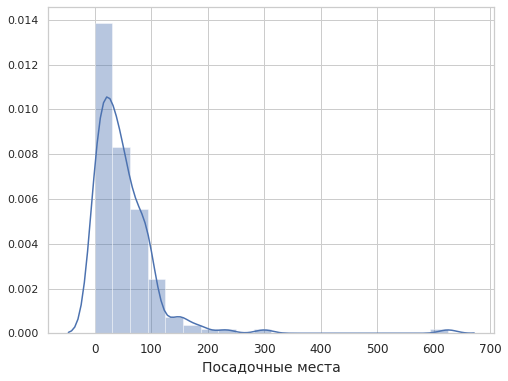

--------------- Распределение количества посадочных мест: Пресненская набережная ---------------

count    167.000000
mean      45.844311
std       65.316834
min        0.000000
25%        8.500000
50%       30.000000
75%       50.000000
max      478.000000
Name: number, dtype: float64



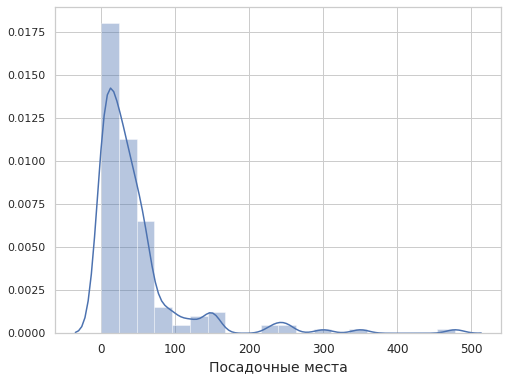

--------------- Распределение количества посадочных мест: Варшавское шоссе ---------------

count    165.000000
mean      52.278788
std       74.345813
min        0.000000
25%        8.000000
50%       30.000000
75%       64.000000
max      500.000000
Name: number, dtype: float64



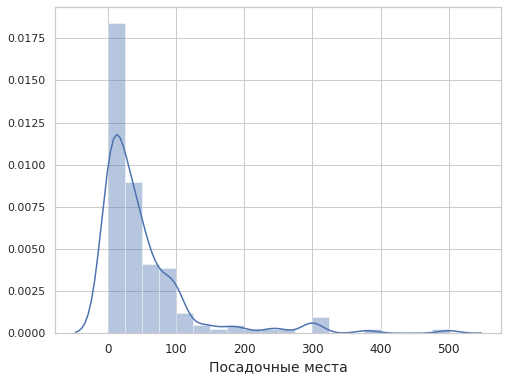

--------------- Распределение количества посадочных мест: Ленинский проспект ---------------

count    148.000000
mean      63.148649
std       67.850412
min        0.000000
25%       20.000000
50%       45.000000
75%       80.000000
max      495.000000
Name: number, dtype: float64



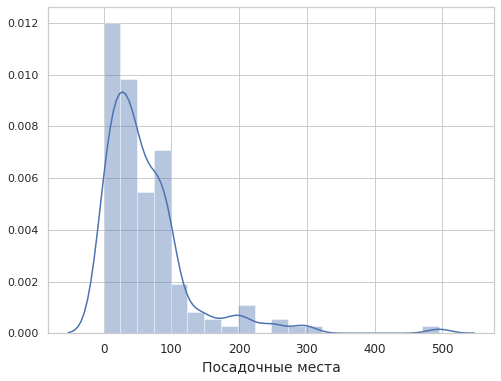

--------------- Распределение количества посадочных мест: проспект Вернадского ---------------

count     132.000000
mean       66.969697
std       121.864331
min         0.000000
25%        20.000000
50%        40.000000
75%        80.000000
max      1288.000000
Name: number, dtype: float64



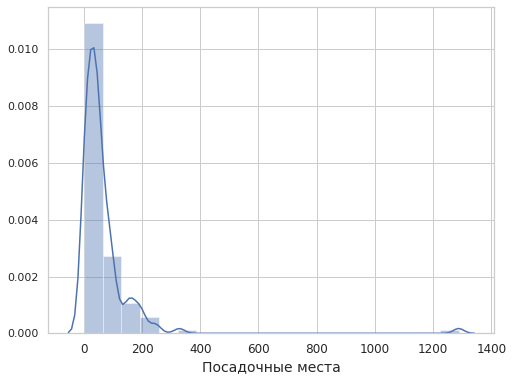

--------------- Распределение количества посадочных мест: Кутузовский проспект ---------------

count     114.000000
mean       85.061404
std       194.464196
min         0.000000
25%        20.000000
50%        40.000000
75%        96.000000
max      1700.000000
Name: number, dtype: float64



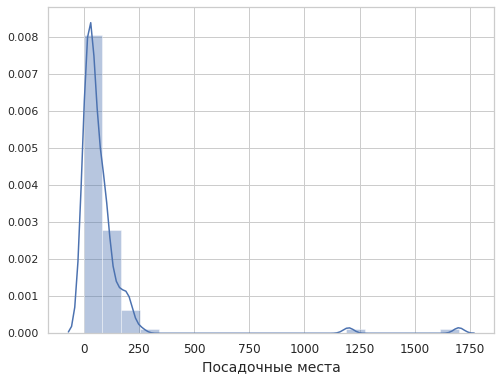

--------------- Распределение количества посадочных мест: Каширское шоссе ---------------

count    112.000000
mean      55.098214
std       87.670756
min        0.000000
25%        7.500000
50%       25.000000
75%       76.250000
max      680.000000
Name: number, dtype: float64



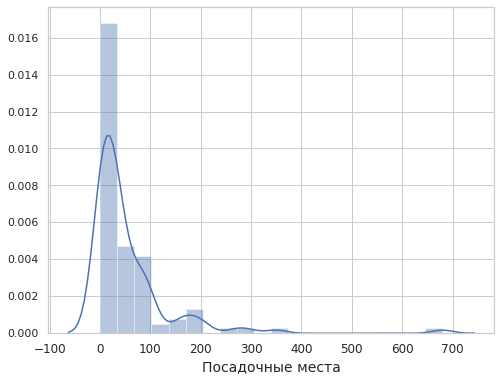

--------------- Распределение количества посадочных мест: Кировоградская улица ---------------

count    110.000000
mean      59.790909
std       79.166077
min        0.000000
25%        6.000000
50%       30.000000
75%       68.500000
max      300.000000
Name: number, dtype: float64



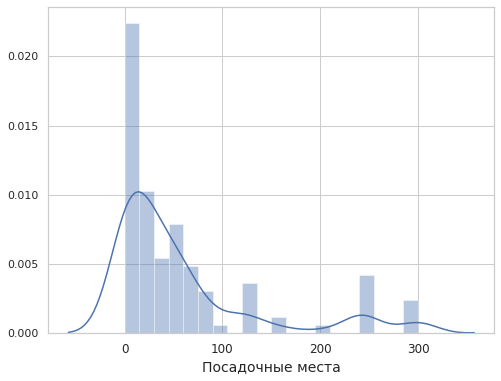

In [85]:
sns.set(style="whitegrid")
for street in top_streets['street']:

    print('-'*15, colored('Распределение количества посадочных мест:', "red", attrs=["bold"]),
                          colored(street, 'red', attrs=["bold"]),'-'*15)
    plt.figure(figsize=(8, 6))
    sns.distplot(rest_data[rest_data['street'] == street]['number'], bins=20)
    plt.xlabel("Посадочные места", fontsize = 14)
    plt.xticks(fontsize=12)
    print()
    print(rest_data[rest_data['street'] == street]['number'].describe())
    print()
    plt.show()

---
Для каждого распределения количества посадочных мест характерно наличие пика около нуля. Все графики скошены положительно. Похоже, что количество посадочных мест распределено нормально. В основном среднее количество посадочных мест для улиц с большим количеством общепитов соствляет от 30 до 45. 

<a id = "Step3"></a>
### Шаг 3. Вывод
---

- [Введение](#Введение)  
- [2 Анализ данных](#Step2) 
    - [2.1](#Step2.1) 
    - [2.2](#Step2.2) 
    - [2.3](#Step2.3) 

В рамках настоящего проекта было необходимо подготовить исследование рынка заведений общественного питания г. Москвы на основе открытых данных. Анализ рынка проводился, чтобы определить перспективы открытия небольшого кафе, обслуживание в котором будут осуществлять роботы. 

Анализ проводилс на основе данных о 15366 заведениях общественного питания столицы. Все заведения разделены на 9 категорий. 

Было установлено,что кафе - самый популярный вид заведения общественного питания в Москве. На втором месте по числу общепитов находятся столовые. Вероятно это связано с большим числом образовательных учреждений, а также различными предприятиями, при которых существуют данные объекты. Третье место занимают рестораны. 
В совокупности кафе, столовые и рестораны занимают больше 70% всего рынка общепита столицы. 

Соотношение видов объектов общественного питания по количеству:

|Вид заведения|  Кол-во |
|--------:|   --------:     |         
|Кафе 	  |   6155       | 
|Столовая 	  |   2584        |
|Ресторан 	  |   2170        |
|Предприятие быстрого обслуживания 	 	  |   2131        |
|Бар	  |   854        |

По нашим данным доля несетевых объектов общественного питания превышает 80%. Чаще всего сетями становятся кафе, предприятия быстрого обслуживания и рестораны. Сетевое распространение больше всего характерно для предприятий быстрого обслуживаиния.

Были проанализированы сетевые объекты общетвенного питания. В половине сетевых общепитов число мест не превышает 42.
Также мы не выявили зависимости между количеством посадочных мест и числом заведений в сети. Эти показатели никак не влияют друг на друга. 

Самое большое количество посадочных мест предоставляют столовые - 130 штук в среднем. Далее идут рестораны и буфеты - по 100 и 52 места соответственно.

Больше всего заведений общепита находятся на проспекте Мира, Профсоюзной улице и Ленинградском проспекте.

ТОП-10 улиц по количеству объектов общественного питания:

|Улица|  Кол-во заведений |
|--------:|   --------:     |         
|проспект Мира 	  |   204      | 
|Профсоюзная улица	  |   183        |
|Ленинградский проспект 	  |   173        |
|Пресненская набережная |   167        |
|Варшавское шоссе 		  |   165        |
|Ленинский проспект 		  |   148        |
|проспект Вернадского 	 		  |   132        |
|Кутузовский проспект 		  |   114        |
|Каширское шоссе 		  |   112        |
|Кировоградская улица 	 		  |   110        |

Улицы из топ-10 преимущественно находятся в разных частях города и не пересекаются. Здесь можно выделить только Пресненскую набережную. Она на четвертом месте по количеству объектов общественного питания, но в отличие от остальных, находится в пределах одного района. Также это самая короткая из всех представленных в нашем топе улица.
Такая высокая плотность общепитов в одном месте обусловлена тем, что на пресненской набережной располагается Московский международный деловой центр «Москва-Сити». Здесь очень много офисов, большой торговый центр, а также находится экспоцентр.

В Москве обнаружено 756 улиц, на каждой из которых находится всего одно заведение общественного питания. Эти улицы распределены по 127 районам. Было выявлено, что в центральных районах (Таганский, Хамовники, Басманный) больше улиц с одним общепитом нежели чем в спальных районах (Марьино, Перово, Левобережный). Это связано с тем, что центре города исторически более плотная застройка с множеством улиц небольшой протяженности. 

**Рекомендации по открытию заведения общественного питания**

На основе проведенного анализа можно порекомендовать открыть кафе на 30 - 45 посадочных мест, так как этот формат является наиболее распространенным и оптимальным. В плане расположения заведения стоит присмотреться к улицам центральных районов города. В центре Москвы можно найти улицы, на которых нет никаких общепитов или их очень мало. Плюс ко всему центральные районы города отличаются высокой транспортной доступностью и хорошей проходимостью.
Если данное заведение будет пользоваться успехом у аудитории, можно будет думать о развитии сети. В этом случае рекомендуется рассмотреть открытие предприятие быстрого обслуживания, как альтернативного варианта вида заведения. 

### Презентация 

https://drive.google.com/file/d/1RPmPt36lFhpGD_VVgqM93W9CvRXkEsIP/view?usp=sharing